In [73]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("Resources/electricity_ml.csv")

In [29]:
df.head()

,Date,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,...,Holiday_Good Friday,Holiday_Holy Saturday,Holiday_June Bank Holiday,Holiday_May Day,Holiday_New Year's Day,Holiday_New Year's Eve,Holiday_None,Holiday_October Bank Holiday,Holiday_St Patrick's Day,Holiday_St Stephen's Day
0,2011-11-01 00:00:00,0,1,44,1,11,2011,0,315.31,3388.77,...,0,0,0,0,0,0,1,0,0,0
1,2011-11-01 00:30:00,0,1,44,1,11,2011,1,321.80,3196.66,...,0,0,0,0,0,0,1,0,0,0
2,2011-11-01 01:00:00,0,1,44,1,11,2011,2,328.57,3060.71,...,0,0,0,0,0,0,1,0,0,0
3,2011-11-01 01:30:00,0,1,44,1,11,2011,3,335.60,2945.56,...,0,0,0,0,0,0,1,0,0,0
4,2011-11-01 02:00:00,0,1,44,1,11,2011,4,342.90,2849.34,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df = df.drop("Unnamed: 0", axis=1)

In [33]:
#Viewing correlation of variables with price
df.corr()[['Price $']].sort_values(by='Price $', ascending=False)

,Price $
Price $,1.000000
PriceForecast$,0.618158
NationalSystemLoad MWh,0.517081
NationalLoadForecast,0.491096
HalfHourPeriod,0.323490
Year,0.045456
Holiday_Easter,0.015189
Holiday_St Patrick's Day,0.012959
Holiday_Good Friday,0.011249
Holiday_May Day,0.004819


In [44]:
#Setting up dependent and independent features
X = df.drop(["Price $","Date"], axis=1)
y = df["Price $"]

In [45]:
X.head()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,...,Holiday_Good Friday,Holiday_Holy Saturday,Holiday_June Bank Holiday,Holiday_May Day,Holiday_New Year's Day,Holiday_New Year's Eve,Holiday_None,Holiday_October Bank Holiday,Holiday_St Patrick's Day,Holiday_St Stephen's Day
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,...,0,0,0,0,0,0,1,0,0,0
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,...,0,0,0,0,0,0,1,0,0,0
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,...,0,0,0,0,0,0,1,0,0,0
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,...,0,0,0,0,0,0,1,0,0,0
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,...,0,0,0,0,0,0,1,0,0,0


In [64]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X, y)

score = model2.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.443532538842737


In [58]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

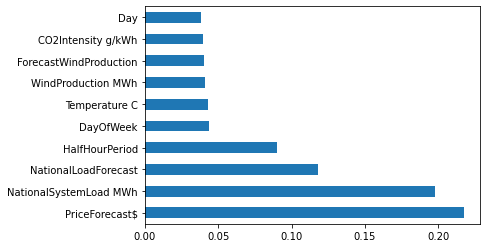

In [59]:
#plot graph of feature importances for better visualisation 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh') 
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [74]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
#Create parameters
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [77]:
rf_model = RandomForestRegressor()

In [81]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [82]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)